# Lab 9: Spatial Analysis 

To grid the data, you can follow the examples given in Demo # 3 in the [lecture demo notebook](https://nbviewer.jupyter.org/github/EASC-305/EASC-305-Spring-2020/blob/main/Lec_Demos/07_SpatialAnalysis/07_SpatialAnalysis_p1.ipynb) for this week's material. For more details on `SciPy`'s interpolation schemes see the [interpolation tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html#multivariate-data-interpolation-griddata) on the `SciPy` documentation page. 

After the data are gridded, there are (at least) three ways to go about the trend analysis:  

1. __Method 1__: follow Demo # 4 in this week's [lecture demo notebook](https://nbviewer.jupyter.org/github/EASC-305/EASC-305-Spring-2020/blob/main/Lec_Demos/07_SpatialAnalysis/07_SpatialAnalysis_p1.ipynb) (_linear only_)
2. __Method 2__: use `scipy.optimize.curve_fit` with a multi-dimensional input array for `x` (_linear and quadratic_)
3. __Method 3__: use the `LinearRegression` class from `sklearn.linear_model` (_linear and quadratic_) 

Some pointers/recommendations for each will follow below. 

---

## Method 1: Demo #4 from [lecture demo notebook](https://nbviewer.jupyter.org/github/EASC-305/EASC-305-Spring-2020/blob/main/Lec_Demos/07_SpatialAnalysis/07_SpatialAnalysis_p1.ipynb)

This method might be the most straightforward since we already have some starter code. One important thing to note is that only a linear surface trend was demonstrated in the lecture demo. If students attempt the linear trend removal but are still unable to determine the location of the UXOs they will need to use one of the other approaches (i.e. __Methods 2__ or __3__) to fit and remove a quadratic surface trend. 

---

## Method 2: Using `scipy.optimize.curve_fit`:

Here is an example of 1-D curve fitting from the documentation to `curve_fit` from `scipy.optimize`:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

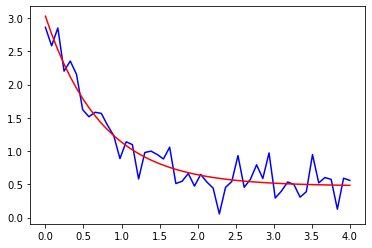

In [7]:
# Define a function
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Create some synthetica data
xdata = np.linspace(0, 4, 50)
y     = func(xdata, 2.5, 1.3, 0.5)

# Add noise to the synthetic data 
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

# Fit the curve
popt, pcov = curve_fit(func, xdata, ydata)

# Plot the noisy signal
plt.plot(xdata, ydata, 'b-', label='data')
# Plot the fitted curve
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a={:5.3f}, b={:5.3f}, c={:5.3}f'.format(*popt));

We should be relatively familiar with this function since it was used in a previous timeseries analysis assignment. The `curve_fit` function can be extend to higher dimensions (e.g. 2-D) by passing multiple independent variables to the function. The function to be fit must still be of the form:

```python
def func(x, a, b, c, ...):
    return 
```

but `x` is not limited to a vector of dimension $N\times1$. Instead, it can be $N\times M$ where $M$ is the number of dimensions of the data. Let's say we have a two dimensional function: 
$$
\bf{Z}(\bf{X}, \bf{Y})= \bf{X} + \bf{Y}.
$$
To write this in python using the formatting required by `curve_fit`, one would write: 
```python
def func(x):
    return x[:, 0] + x[:, 1],
```

where
```python
print(x.shape)
```
returns `(N, 2)`.

For this week's lab, write a python function (`func`) of the form: 
$$
\hat{ \mathbf{Z} } = \beta_0 +  \beta_1 \mathbf{X} + \beta_2 \mathbf{Y}
$$
or 
$$
\hat{ \mathbf{Z} } = \beta_0 +  \beta_1 \mathbf{X} + \beta_2 \mathbf{Y} + \beta_3 \mathbf{X}^2 + \beta_4 \mathbf{Y}^2 + \beta_5 \mathbf{X} \mathbf{Y}
$$
to be fit by `curve_fit` if this is the method you choose. 

---

## Method 3: Using `sklearn`

A simple linear regression can be done through `sklearn` using the [`linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) class. Check the [`sklearn` tutorial](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) for a demo. 

When using this method for multi-dimensional data, your input vector `X` will need to be $N\times M$ where $N$ is the number of data points (i.e. rows) and $M$ is the number of dimensions. In the case of a 1-D linear regression `X` would be $N\times 1$ where $N$ is the number of observations. Conversely, for two dimensional data `X` would be $N\times2$ where $N$ is the number of observations with column one being the $x$-coordinate and column 2 being the $y$-coordinate. 


If you need to fit a quadratic surface to the data you can use [`preprocessing.PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) in conjunction with [`linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) through the `pipeline.Pipeline` class. See the [`sklearn` tutorial](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) for a demo on polynomial regression. The code to create a quadratic regression model using the packages decribed above would be: 
```python 

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
```

An added benefit of using the `sklearn` approach is that `sklearn` models have the `.score()` method, which easily computes the $R^2$ coefficent. You can check the `sklearn` documentation for more [regression metrics](https://scikit-learn.org/stable/modules/classes.html#regression-metrics) to check the "goodness of fit." 